In [76]:
import numpy as np
import pandas as pd

df = pd.read_csv("./dataSet.csv" , low_memory=False)
df_ori = df.loc[:,["season","league",'name']]
df_use = df.drop(["Unnamed: 2","position1","position2"], axis=1)
df_use= df_use.replace(["-"],0)
df = df_use

In [77]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
for i in range(5,30):
    df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='coerce')

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17175 entries, 0 to 17174
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    17173 non-null  object 
 1   league    17173 non-null  object 
 2   name      17174 non-null  object 
 3   age       17173 non-null  float64
 4   Apps      17174 non-null  object 
 5   Mins      17173 non-null  float64
 6   Assists   17173 non-null  float64
 7   Rating    17173 non-null  float64
 8   Tackles   17173 non-null  float64
 9   Inter     17172 non-null  float64
 10  Fouls     17173 non-null  float64
 11  Offsides  17173 non-null  float64
 12  Clear     17173 non-null  float64
 13  Drb       17173 non-null  float64
 14  Blocks    17173 non-null  float64
 15  OwnG      17173 non-null  float64
 16  Goals     17173 non-null  float64
 17  SpG       17173 non-null  float64
 18  KeyP      17173 non-null  float64
 19  Drb.1     17173 non-null  float64
 20  Fouled    17173 non-null  fl

In [78]:
df.head()

,season,league,name,age,Apps,Mins,Assists,Rating,Tackles,Inter,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,2019-2020,LaLiga,Lionel Messi Barcelona,34.0,32(1),2881.0,21.0,8.71,0.6,0.2,...,2.1,0.4,2.4,2.1,2.7,59.8,82.6,0.8,2.2,0.6
1,2019-2020,LaLiga,Guillermo Maripán Deportivo Alaves,27.0,1,90.0,0.0,7.54,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,12.0,75.0,0.0,1.0,0.0
2,2019-2020,LaLiga,Casemiro Real Madrid,29.0,35,3091.0,3.0,7.47,2.7,1.9,...,1.9,0.1,0.8,0.7,0.4,61.5,84.1,0.2,6.5,0.0
3,2019-2020,LaLiga,Karim Benzema Real Madrid,33.0,36(1),3155.0,8.0,7.44,0.5,0.2,...,0.4,0.7,1.1,1.7,1.6,34.7,86.2,0.0,1.4,0.1
4,2019-2020,LaLiga,Luis Suárez Barcelona,34.0,22(6),2002.0,8.0,7.33,0.1,0.0,...,0.9,0.6,0.9,1.2,0.9,23.4,75.5,0.1,0.9,0.0


In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

mins_cut = df["Mins"] > 900
df = df[mins_cut]
df_last = df

df_train, df_test = train_test_split(df, random_state=13)

df_sub = df_train.iloc[:,[0,1,2,4]]
df_sub_test = df_test.iloc[:,[0,1,2,4]]

df_train = df_train.drop(["season","league","name","Apps"], axis=1)
df_test = df_test.drop(["season","league","name","Apps"], axis=1)

standard_scaler = StandardScaler()
df_scaled_train = pd.DataFrame(standard_scaler.fit_transform(df_train), columns=df_train.columns)
df_scaled_test = pd.DataFrame(standard_scaler.fit_transform(df_test), columns=df_test.columns)

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")
plt.rcParams["figure.figsize"] = (15, 9)
df_scaled.dropna()

#데이터의 대략적인 분포 및 해석을 위한 시각화 - 데이터 설명시 사용
#sns.distplot(df["Goals"], rug=False, hist=False, kde=True)
#plt.show()

pd.set_option('display.max_rows', 10 )
df

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,34.0,2881.0,21.0,8.71,0.6,0.2,0.6,0.0,0.0,0.5,...,2.1,0.4,2.4,2.1,2.7,59.8,82.6,0.8,2.2,0.6
2,29.0,3091.0,3.0,7.47,2.7,1.9,2.5,0.1,1.9,1.7,...,1.9,0.1,0.8,0.7,0.4,61.5,84.1,0.2,6.5,0.0
3,33.0,3155.0,8.0,7.44,0.5,0.2,0.6,0.0,0.8,0.4,...,0.4,0.7,1.1,1.7,1.6,34.7,86.2,0.0,1.4,0.1
4,34.0,2002.0,8.0,7.33,0.1,0.0,0.5,0.0,0.4,0.4,...,0.9,0.6,0.9,1.2,0.9,23.4,75.5,0.1,0.9,0.0
5,25.0,3144.0,1.0,7.31,2.2,1.4,2.1,0.1,1.4,1.6,...,2.5,0.1,1.4,1.6,0.9,53.7,75.8,0.2,2.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16766,36.0,1135.0,1.8,6.27,0.3,0.1,1.0,0.0,0.2,0.4,...,0.3,0.9,0.6,0.9,0.5,12.8,64.7,0.0,0.0,0.0
16772,30.0,1062.0,0.8,6.26,0.5,0.7,0.7,0.2,1.5,0.4,...,0.4,0.4,0.1,0.4,0.4,26.3,78.9,0.1,1.2,0.0
16782,34.0,1350.0,0.0,6.24,0.0,0.1,0.0,0.0,0.9,0.1,...,0.0,0.1,0.0,0.0,0.0,27.6,61.1,0.0,7.4,0.0
16803,28.0,1438.0,0.9,6.19,1.4,0.5,1.1,0.0,0.9,1.0,...,0.4,0.8,0.0,0.4,0.3,28.9,84.5,0.0,2.6,0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


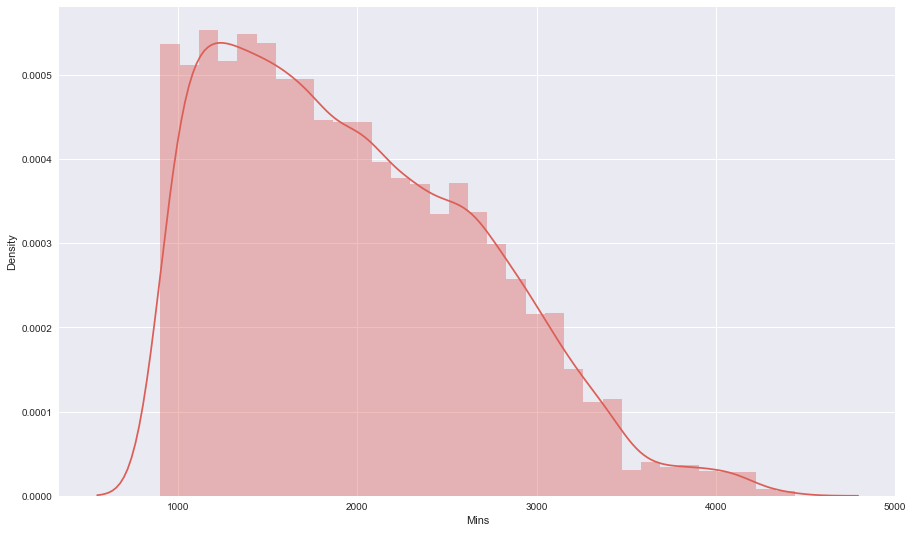

In [50]:
sns.distplot(df['Mins'])
plt.show()

In [80]:
df_scaled_train
pd.set_option('display.max_rows', 10 )

In [81]:
df_scaled_train[np.isnan(df_scaled_train) == True] = 0
df_scaled_test[np.isnan(df_scaled_test) == True] = 0

In [84]:
df_scaled_test

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Fouled,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB
0,-0.692294,-0.748543,-0.390623,0.001047,0.090553,0.141378,-0.102450,-0.178554,-0.162851,-0.558814,...,0.051009,-0.156051,-0.734836,-0.780658,-0.163775,-0.704901,0.041714,0.158551,-0.792019,-0.237557
1,-0.923604,1.910139,-0.917048,-0.175968,-1.664543,-1.382802,-1.878883,-0.624543,-0.754870,-1.502393,...,-1.099128,-0.993816,-0.734836,-1.078014,-0.165759,-0.510372,-0.600871,-0.729807,2.272854,-0.237557
2,0.232950,-0.111016,0.267409,0.107255,-0.640737,-0.874742,-0.497213,-0.624543,-0.680868,-0.794708,...,-0.770517,0.849266,-0.047392,-0.185946,-0.164058,-1.120791,0.185845,-0.285628,-0.895913,-0.237557
3,-1.386226,-0.947596,-0.324819,0.231166,0.675585,-0.027976,-0.497213,-0.624543,-0.680868,-0.087024,...,0.379619,0.011502,-0.276540,-0.483302,-0.160941,0.489107,0.564189,1.268998,0.558603,-0.237557
4,0.232950,-0.159735,0.793835,0.054151,-0.201963,-1.044095,0.489695,-0.624543,-0.754870,-0.794708,...,0.708230,0.849266,0.410903,0.854800,-0.164058,-0.456708,0.143807,-0.729807,-0.272549,-0.237557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,-1.617537,1.477234,0.004196,0.301972,-0.055705,0.649437,0.489695,-0.624543,-0.236854,1.092450,...,0.543925,1.854584,-0.734836,0.111410,-0.160374,0.549478,0.161823,3.711982,0.506656,0.330667
2254,1.852126,-0.479890,-0.917048,0.452434,-0.055705,-0.027976,-0.299831,0.267435,3.241259,-0.794708,...,-0.770517,-0.993816,-0.505688,-0.929336,-0.165192,0.764131,0.906500,-0.507717,0.143027,-0.237557
2255,0.232950,1.184918,-0.324819,-5.327097,0.090553,-0.027976,-0.299831,0.267435,-0.014846,-0.322919,...,-0.606212,0.179055,-0.505688,-1.078014,3.524137,-1.932449,-4.348278,1.268998,-0.792019,8.854027
2256,-0.229672,-0.257174,-0.259016,-5.592619,0.090553,0.818791,-0.497213,-0.178554,0.281163,0.148871,...,0.215314,0.346607,-0.734836,-0.780658,9.271531,-2.066607,-4.348278,-0.729807,-1.103701,-0.237557


In [54]:
#from sklearn.cluster import KMeans

#Find elbow point

#def change_n_clusters(n_clusters, data):
#    sum_of_squared_distance = []
#    for n_cluster in n_clusters:
#        kmeans = KMeans(n_clusters=n_cluster)
#        kmeans.fit(df_scaled)
#        sum_of_squared_distance.append(kmeans.inertia_)
        
#    plt.plot(n_clusters , sum_of_squared_distance , 'o')
#    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
#    plt.xlabel('Number of Clusters')
#    plt.ylabel('Cost')
    
#n_clusters = [2,3,4,5,6,7,8,9]
#change_n_clusters(n_clusters, df_scaled)


In [161]:
#모델에 대한 결과 확인 예시 코드 - train and test / 모델 = 42 / train-test = 13
from sklearn.cluster import KMeans

#----------------------------------------------------------------------
#{간단한 모델 / 복잡한 모델} => 중요 피쳐만 써서 시각화 
#중요한 피쳐만 뽑은 모델 / 다넣은 모델이랑 결과를 비교해보자

#피쳐 개수 => 5개 / 30개 { 골 , 어시스트 , 블락 , 인터셉트 , 태클 }
#K = 50 / 100 / 150 / 200 / 250 / 300
#Mins = 900

#위 파라미터에 대해서 시나리오에 각각 적용하고 의미있는 결과 보이기
#----------------------------------------------------------------------

k = 300 #k_means 파라미터 k 개수 -> 50 ~ 300

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled_train)

df_test_result = kmeans.predict(df_scaled_test)

result_by_sklearn = df_scaled_train.copy()
result_by_sklearn["cluster"] = kmeans.labels_

test_result = df_scaled_test.copy()
test_result["cluster"] = df_test_result

result_by_sklearn.head()

result_by_sklearn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772 entries, 0 to 6771
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       6772 non-null   float64
 1   Mins      6772 non-null   float64
 2   Assists   6772 non-null   float64
 3   Rating    6772 non-null   float64
 4   Tackles   6772 non-null   float64
 5   Inter     6772 non-null   float64
 6   Fouls     6772 non-null   float64
 7   Offsides  6772 non-null   float64
 8   Clear     6772 non-null   float64
 9   Drb       6772 non-null   float64
 10  Blocks    6772 non-null   float64
 11  OwnG      6772 non-null   float64
 12  Goals     6772 non-null   float64
 13  SpG       6772 non-null   float64
 14  KeyP      6772 non-null   float64
 15  Drb.1     6772 non-null   float64
 16  Fouled    6772 non-null   float64
 17  Off       6772 non-null   float64
 18  Disp      6772 non-null   float64
 19  UnsTch    6772 non-null   float64
 20  KeyP.1    6772 non-null   floa

In [86]:
test_result

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB,cluster
0,-0.692294,-0.748543,-0.390623,0.001047,0.090553,0.141378,-0.102450,-0.178554,-0.162851,-0.558814,...,-0.156051,-0.734836,-0.780658,-0.163775,-0.704901,0.041714,0.158551,-0.792019,-0.237557,237
1,-0.923604,1.910139,-0.917048,-0.175968,-1.664543,-1.382802,-1.878883,-0.624543,-0.754870,-1.502393,...,-0.993816,-0.734836,-1.078014,-0.165759,-0.510372,-0.600871,-0.729807,2.272854,-0.237557,71
2,0.232950,-0.111016,0.267409,0.107255,-0.640737,-0.874742,-0.497213,-0.624543,-0.680868,-0.794708,...,0.849266,-0.047392,-0.185946,-0.164058,-1.120791,0.185845,-0.285628,-0.895913,-0.237557,37
3,-1.386226,-0.947596,-0.324819,0.231166,0.675585,-0.027976,-0.497213,-0.624543,-0.680868,-0.087024,...,0.011502,-0.276540,-0.483302,-0.160941,0.489107,0.564189,1.268998,0.558603,-0.237557,35
4,0.232950,-0.159735,0.793835,0.054151,-0.201963,-1.044095,0.489695,-0.624543,-0.754870,-0.794708,...,0.849266,0.410903,0.854800,-0.164058,-0.456708,0.143807,-0.729807,-0.272549,-0.237557,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,-1.617537,1.477234,0.004196,0.301972,-0.055705,0.649437,0.489695,-0.624543,-0.236854,1.092450,...,1.854584,-0.734836,0.111410,-0.160374,0.549478,0.161823,3.711982,0.506656,0.330667,234
2254,1.852126,-0.479890,-0.917048,0.452434,-0.055705,-0.027976,-0.299831,0.267435,3.241259,-0.794708,...,-0.993816,-0.505688,-0.929336,-0.165192,0.764131,0.906500,-0.507717,0.143027,-0.237557,23
2255,0.232950,1.184918,-0.324819,-5.327097,0.090553,-0.027976,-0.299831,0.267435,-0.014846,-0.322919,...,0.179055,-0.505688,-1.078014,3.524137,-1.932449,-4.348278,1.268998,-0.792019,8.854027,11
2256,-0.229672,-0.257174,-0.259016,-5.592619,0.090553,0.818791,-0.497213,-0.178554,0.281163,0.148871,...,0.346607,-0.734836,-0.780658,9.271531,-2.066607,-4.348278,-0.729807,-1.103701,-0.237557,38


In [87]:
result_by_sklearn.head()

,age,Mins,Assists,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb,...,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB,cluster
0,0.729623,-0.589796,-0.243766,-0.163864,-0.949643,-0.917416,0.903308,-0.631301,-0.714191,-1.047128,...,-0.338780,0.210926,0.906060,-0.177619,-1.486450,-0.037027,-0.725657,-1.058003,-0.25335,187
1,-1.630993,2.091623,-0.243766,0.409228,0.325249,0.592629,-0.290370,0.713233,1.975202,-1.047128,...,-0.826945,-0.254955,-0.771274,-0.177619,0.962068,0.407964,-0.725657,0.853213,-0.25335,177
2,0.021438,1.046417,-0.243766,0.306585,1.175178,0.257064,0.306469,0.265055,-0.116548,1.712074,...,0.149386,-0.487896,0.601090,-0.175128,0.599821,0.581337,1.870188,-0.705937,-0.25335,51
3,-1.158870,-0.872987,-0.830516,-0.035560,-0.807988,-0.414067,-1.086156,-0.631301,0.182274,-1.506995,...,-0.501502,-0.720836,-0.923759,-0.177619,1.170024,0.887630,-0.725657,0.752623,-0.25335,69
4,0.021438,0.284401,0.147400,0.315138,1.316832,0.760412,0.903308,-0.631301,-0.415369,4.471276,...,0.962995,-0.720836,0.143636,-0.174852,1.773768,0.835618,0.355945,0.802918,-0.25335,193


In [92]:
df_sub.reset_index(drop=True , inplace=True)
df_sub_test.reset_index(drop=True , inplace=True)
df_sub.info()
df_sub

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6772 entries, 0 to 6771
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   season  6772 non-null   object
 1   league  6772 non-null   object
 2   name    6772 non-null   object
 3   Apps    6772 non-null   object
dtypes: object(4)
memory usage: 211.8+ KB


,season,league,name,Apps
0,2020-2021,SuperLig,Dever Orgill Antalyaspor,16(16)
1,2020-2021,LeagueOne,Jacob Greaves Hull,39
2,2019-2020,Brazil,Gilberto Fluminense,31
3,2020-2021,Eredivsie,Justin Hoogma FC Utrecht,14(5)
4,2019-2020,England,Fred Man Utd,23(6)
5,2020-2021,LeagueOne,Aristote Nsiala Ipswich,27
6,2019-2020,LigaNOS,Florent Hanin Vitoria de Guimaraes,26(2)
7,2020-2021,LeagueOne,Sean Clare Burton,19(1)
8,2019-2020,Bundesliga,Vladimír Darida Hertha Berlin,25(3)
9,2019-2020,Bundesliga2,Marko Mihojevic Erzgebirge Aue,23(1)


In [102]:
#----------------------------------------------------------------------
#To-do
#1. 이 클러스터는 어떤선수들이 모였나
#2. 클러스터에 있는 선수들 feature 값 출력해보기
#시나리오 1. 특출난 선수급의 활약을 보여주는 유명하지 않은 선수
#시나리오 2. 팀의 주전급 선수가 이탈하게 되어 대신할 선수 찾기

#To-do option
#{간단한 모델 / 복잡한 모델} => 중요 피쳐만 써서 시각화 
#중요한 피쳐만 뽑은 모델 / 다넣은 모델이랑 결과를 비교해보자

#피쳐 개수 => 5개 / 30개 { 골 , 어시스트 , 블락 , 인터셉트 , 태클 }
#K = 50 / 100 / 150 / 200 / 250 / 300
#Mins = 900

#위 파라미터에 대해서 시나리오에 각각 적용하고 의미있는 결과 보이기

#-----------------------------------------------------------------------

#google 검색 : soccer scout process -> 축구 스카우팅 과정들이 나와있음 나중에 보고서 쓸 때 활용해도 될듯

#실제 스카우팅 과정에서 사용 = 각 축구 클럽은 해당 클럽에 속한 나라에 스카우팅 본사를 둔다
#이후 각 나라에 스카우터들을 파견하고 현지 스카우터는 그 나라에 머무르면서 스카우팅을 지속적으로 진행한다.
#모든 나라에 스카우터들을 보낼 수 없으므로 이 과정속에서 놓치는 나라와 그 나라의 선수들이 존재한다.
#이 부분에서 그 나라의 선수들의 데이터를 수집할 수 있다면 이러한 모델이 시나리오상 도움이 될 수 있다.
#현지 스카우터를 파견하지 않고서도 현지 스카우터를 파견한 것과 같은 효과를 낼 수 있을 수 있다.
#----------------------------------------------------------------------

In [164]:
#해당 클러스터에 속하는 선수들 전체 확인 - train

df_c = result_by_sklearn[['cluster']]
df_c.reset_index(drop=True , inplace=True)

df_cluster = pd.concat([df_sub, df_c], axis = 1)
#df_cluster

find_player = input("살펴보고 싶은 비슷한 선수들의 기준 선수 이름 입력 : ")
idx = df_cluster.index[df_cluster['name'] == find_player]
cluster_idx = []
for i in idx:
    cluster_idx.append(int(df_cluster.loc[i,["cluster"]].values))
print(cluster_idx)

#예시 : Lionel Messi Barcelona (복사해서 확인) / Nuno Tavares Benfica

#판다스 열 전체 보기 None 대신 10으로 두기
pd.set_option('display.max_rows', None)


p = 0

for i in cluster_idx:
    print("---------------------------------------------------------------------------------")
    print("기준 선수")
    print("")
    print(df_cluster.loc[idx[p],:])
    print("---------------------------------------------------------------------------------")
    print(df_cluster.loc[(df_cluster['cluster'] == i)])
    print("---------------------------------------------------------------------------------")
    p += 1


살펴보고 싶은 비슷한 선수들의 기준 선수 이름 입력 : 
[]


In [165]:
#해당 클러스터에 속하는 선수들 전체 확인 - train

pd.set_option('display.max_rows', None)

find_player = int(input("살펴보고 싶은 클러스터 번호 입력 : "))
idx = df_cluster[df_cluster['cluster'] == find_player]
print("---------------------------------------------------------------------------------")
print("살펴보는 클러스터 번호 : %d" %find_player)
print(idx)
print("---------------------------------------------------------------------------------")
    

살펴보고 싶은 클러스터 번호 입력 : 94
---------------------------------------------------------------------------------
살펴보는 클러스터 번호 : 94
         season        league                              name   Apps  \
548   2020-2021     LeagueOne           Dan Butler Peterborough  40(2)   
944   2020-2021   Premiership  Scott McMann Hamilton Academical     31   
1391  2019-2020  Championship               Matt Grimes Swansea     48   
1604  2020-2021  Championship              Joe Jacobson Wycombe  36(1)   
2027  2020-2021      SuperLig      Karim Hafez Yeni Malatyaspor  31(2)   
2183  2019-2020  Championship                 Tommy Smith Stoke  27(3)   
2202  2020-2021     LeagueTwo           Chris Hussey Cheltenham     43   
2487  2020-2021  Championship               Ryan Ledson Preston  31(5)   
2826  2020-2021  Championship            Barry Bannan Sheff Wed     46   
2865  2019-2020      SuperLig   Gaël Clichy Istanbul Basaksehir  30(1)   
3250  2020-2021        LaLiga               Jesús Navas Sevill

In [162]:
#해당 클러스터에 속하는 선수들 전체 확인 - test

pd.set_option('display.max_rows', None)
    
df_c_test = test_result[['cluster']]
df_c_test.reset_index(drop=True , inplace=True)

df_cluster_test = pd.concat([df_sub_test, df_c_test], axis = 1)
#df_cluster

find_player = int(input("살펴보고 싶은 클러스터 번호 입력 : "))
idx = df_cluster_test[df_cluster_test['cluster'] == find_player]
print("---------------------------------------------------------------------------------")
print("살펴보는 클러스터 번호 : %d" %find_player)
print(idx)
print("---------------------------------------------------------------------------------")
    

살펴보고 싶은 클러스터 번호 입력 : 1
---------------------------------------------------------------------------------
살펴보는 클러스터 번호 : 1
         season        league                              name    Apps  \
163   2020-2021        LaLiga             Ángel Montoro Granada   18(5)   
207   2019-2020     LeagueTwo         Christie Elliott Carlisle   13(3)   
376   2020-2021      SuperLig        Ismail Aissati Denizlispor   11(2)   
400   2019-2020        LaLiga  Víctor Camarasa Deportivo Alaves   15(2)   
533   2020-2021        LaLiga       Daniel Carvajal Real Madrid   11(2)   
594   2020-2021  Championship                   Joe Allen Stoke   15(3)   
780   2020-2021  Championship                Lukas Rupp Norwich   15(8)   
879   2020-2021  Championship            Lewis Holtby Blackburn   20(7)   
1251  2019-2020  Championship              Kieran Lee Sheff Wed   20(8)   
1566  2019-2020        LaLiga               Fran Mérida Osasuna  12(11)   
1924  2019-2020        LaLiga            Ivan Rakitic

In [163]:
df_cluster_test

,season,league,name,Apps,cluster
0,2020-2021,Bundesliga,Denis Zakaria Borussia M.Gladbach,15(10),299
1,2020-2021,LaLiga,Unai Simón Athletic Bilbao,37,122
2,2019-2020,Brazil,Marcelo Athletico Paranaense,19(11),246
3,2020-2021,Russia,Kings Kangwa Arsenal Tula,14(7),263
4,2020-2021,Bundesliga,Karim Onisiwo Mainz,19(12),219
5,2020-2021,LaLiga,Kike García Eibar,36(1),43
6,2019-2020,Ligue1,José Fonte Lille,25,92
7,2019-2020,Bundesliga2,Jannis Nikolaou Dynamo Dresden,30,286
8,2020-2021,SericeA,Emil Audero Sampdoria,37,160
9,2020-2021,LaLiga,Rafa Mir SD Huesca,32(6),197


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


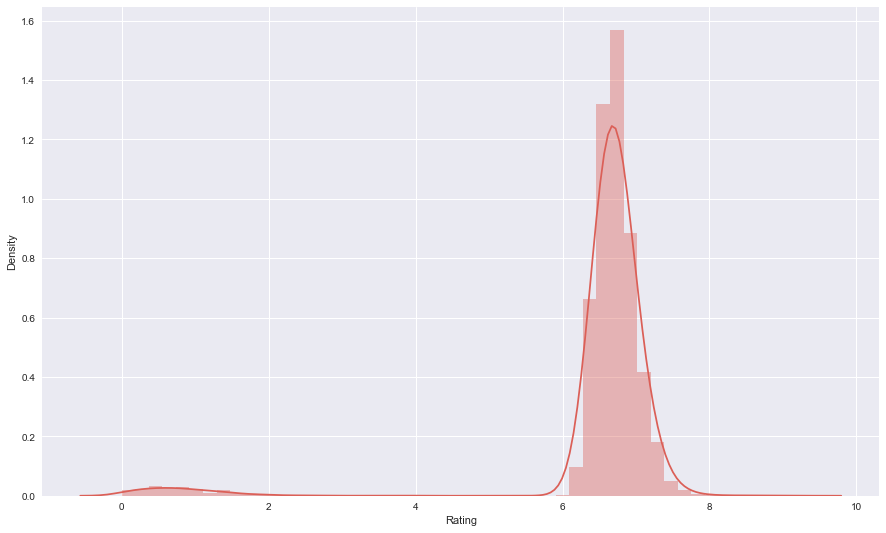

In [103]:
#아래로는 시각화 및 2차 데이터 분석
#--------------------------------------------------------------------------------

#아웃라이어의 기준 => Mins가 특정 값 이하인 선수
#즉 , 표본이 적어 평균적인 수치를 확인하기 어려운 선수

#특별한 선수들은 아웃라이어가 아닌 특정 지표의 기준이 될 수 있다.

#아웃라이어의 기준? => 기본으로 생각하면 Rating 그렇다면 Rating을 기준으로 아웃라이어 체크? 가능은하다.
#혹은 비전문가들의 눈으로 살펴보는 특정 지표를 통한 아웃라이어 검출 , 이를 통해서 기준점 생각 가능

#그런데 특정 아웃라이어 즉 특별한 선수들이 클러스터링 되지 못하는 상황이 생긴다? 그렇다면 k-mean에서 이 선수들을
#다 포함할 수 있을 때까지 돌린다는 마인드

sns.distplot(df['Rating'])
plt.show()


In [104]:
df_last.reset_index(drop=True , inplace=True)
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9030 entries, 0 to 9029
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    9030 non-null   object 
 1   league    9030 non-null   object 
 2   name      9030 non-null   object 
 3   age       9030 non-null   float64
 4   Apps      9030 non-null   object 
 5   Mins      9030 non-null   float64
 6   Assists   9030 non-null   float64
 7   Rating    9030 non-null   float64
 8   Tackles   9030 non-null   float64
 9   Inter     9029 non-null   float64
 10  Fouls     9030 non-null   float64
 11  Offsides  9030 non-null   float64
 12  Clear     9030 non-null   float64
 13  Drb       9030 non-null   float64
 14  Blocks    9030 non-null   float64
 15  OwnG      9030 non-null   float64
 16  Goals     9030 non-null   float64
 17  SpG       9030 non-null   float64
 18  KeyP      9030 non-null   float64
 19  Drb.1     9030 non-null   float64
 20  Fouled    9030 non-null   floa

In [106]:
df_check = df_check.dropna(axis=0)

df_merge = pd.concat([df_last, df_cluster["cluster"]], axis = 1)
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9030 entries, 0 to 9029
Data columns (total 31 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   season    9030 non-null   object 
 1   league    9030 non-null   object 
 2   name      9030 non-null   object 
 3   age       9030 non-null   float64
 4   Apps      9030 non-null   object 
 5   Mins      9030 non-null   float64
 6   Assists   9030 non-null   float64
 7   Rating    9030 non-null   float64
 8   Tackles   9030 non-null   float64
 9   Inter     9029 non-null   float64
 10  Fouls     9030 non-null   float64
 11  Offsides  9030 non-null   float64
 12  Clear     9030 non-null   float64
 13  Drb       9030 non-null   float64
 14  Blocks    9030 non-null   float64
 15  OwnG      9030 non-null   float64
 16  Goals     9030 non-null   float64
 17  SpG       9030 non-null   float64
 18  KeyP      9030 non-null   float64
 19  Drb.1     9030 non-null   float64
 20  Fouled    9030 non-null   floa

In [107]:
q1=df_merge['Rating'].quantile(0.25)
q2=df_merge['Rating'].quantile(0.5)
q3=df_merge['Rating'].quantile(0.75)
iqr=q3-q1
iqr

0.33999999999999986

In [108]:
rating_outs=df_merge['Rating']>q3+1.5*iqr
df_outs = df_merge[rating_outs]
a=df_merge[rating_outs].index
print(a)

Int64Index([   0,    1,    2,  331,  332,  333,  667,  668,  669,  670,
            ...
            8339, 8340, 8665, 8666, 8667, 8668, 8669, 8670, 8671, 8672],
           dtype='int64', length=135)


In [110]:
a = list(a)
for i in a:
    name = df_merge.iloc[i,2]
    print(name , end=" / ")
    print(df_merge.iloc[i,0])


Lionel Messi Barcelona / 2019-2020
Casemiro Real Madrid / 2019-2020
Karim Benzema Real Madrid / 2019-2020
Lionel Messi Barcelona / 2020-2021
Gerard Moreno Villarreal / 2020-2021
Karim Benzema Real Madrid / 2020-2021
José Sosa Trabzonspor / 2019-2020
Alexander Sørloth Trabzonspor / 2019-2020
Edin Visca Istanbul Basaksehir / 2019-2020
Anthony Nwakaeme Trabzonspor / 2019-2020
Rachid Ghezzal Besiktas / 2020-2021
Saïd Benrahma Brentford / 2019-2020
Matheus Pereira West Brom / 2019-2020
Emiliano Buendía Norwich / 2020-2021
Kieffer Moore Cardiff / 2020-2021
Krystian Bielik Derby / 2020-2021
Ivan Toney Brentford / 2020-2021
James Tavernier Rangers / 2020-2021
Ryan Kent Rangers / 2020-2021
Marcus Browne Oxford / 2019-2020
Vadaine Oliver Gillingham / 2020-2021
Robert Atkinson Oxford / 2020-2021
Jayden Stockley Charlton / 2020-2021
Aiden McGeady Sunderland / 2020-2021
Charlie Goode Northampton / 2019-2020
James Vaughan Tranmere / 2020-2021
Cristiano Ronaldo Juventus / 2019-2020
Josip Ilicic Atala

In [36]:
df_merge.head()

,season,league,name,age,Apps,Mins,Assists,Rating,Tackles,Inter,...,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB,cluster
0,2019-2020,LaLiga,Lionel Messi Barcelona,34.0,32(1),2881.0,21.0,8.71,0.6,0.2,...,0.4,2.4,2.1,2.7,59.8,82.6,0.8,2.2,0.6,131
1,2019-2020,LaLiga,Casemiro Real Madrid,29.0,35,3091.0,3.0,7.47,2.7,1.9,...,0.1,0.8,0.7,0.4,61.5,84.1,0.2,6.5,0.0,180
2,2019-2020,LaLiga,Karim Benzema Real Madrid,33.0,36(1),3155.0,8.0,7.44,0.5,0.2,...,0.7,1.1,1.7,1.6,34.7,86.2,0.0,1.4,0.1,163
3,2019-2020,LaLiga,Luis Suárez Barcelona,34.0,22(6),2002.0,8.0,7.33,0.1,0.0,...,0.6,0.9,1.2,0.9,23.4,75.5,0.1,0.9,0.0,163
4,2019-2020,LaLiga,Mikel Merino Real Sociedad,25.0,35(1),3144.0,1.0,7.31,2.2,1.4,...,0.1,1.4,1.6,0.9,53.7,75.8,0.2,2.2,0.0,64


In [37]:
pd.set_option('display.max_rows', 10 )
df_merge

,season,league,name,age,Apps,Mins,Assists,Rating,Tackles,Inter,...,Off,Disp,UnsTch,KeyP.1,AvgP,PS%,Crosses,LongB,ThrB,cluster
0,2019-2020,LaLiga,Lionel Messi Barcelona,34.0,32(1),2881.0,21.0,8.71,0.6,0.2,...,0.4,2.4,2.1,2.7,59.8,82.6,0.8,2.2,0.6,131
1,2019-2020,LaLiga,Casemiro Real Madrid,29.0,35,3091.0,3.0,7.47,2.7,1.9,...,0.1,0.8,0.7,0.4,61.5,84.1,0.2,6.5,0.0,180
2,2019-2020,LaLiga,Karim Benzema Real Madrid,33.0,36(1),3155.0,8.0,7.44,0.5,0.2,...,0.7,1.1,1.7,1.6,34.7,86.2,0.0,1.4,0.1,163
3,2019-2020,LaLiga,Luis Suárez Barcelona,34.0,22(6),2002.0,8.0,7.33,0.1,0.0,...,0.6,0.9,1.2,0.9,23.4,75.5,0.1,0.9,0.0,163
4,2019-2020,LaLiga,Mikel Merino Real Sociedad,25.0,35(1),3144.0,1.0,7.31,2.2,1.4,...,0.1,1.4,1.6,0.9,53.7,75.8,0.2,2.2,0.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9025,2019-2020,USA,Bradley Wright-Phillips New York,36.0,9(16),1135.0,1.8,6.27,0.3,0.1,...,0.9,0.6,0.9,0.5,12.8,64.7,0.0,0.0,0.0,200
9026,2019-2020,USA,Saad Abdul-Salaam Seattle,30.0,11(7),1062.0,0.8,6.26,0.5,0.7,...,0.4,0.1,0.4,0.4,26.3,78.9,0.1,1.2,0.0,115
9027,2019-2020,USA,Przemyslaw Tyton FC Cincinnati,34.0,15,1350.0,0.0,6.24,0.0,0.1,...,0.1,0.0,0.0,0.0,27.6,61.1,0.0,7.4,0.0,203
9028,2019-2020,USA,Caleb Stanko FC Cincinnati,28.0,16(7),1438.0,0.9,6.19,1.4,0.5,...,0.8,0.0,0.4,0.3,28.9,84.5,0.0,2.6,0.0,133


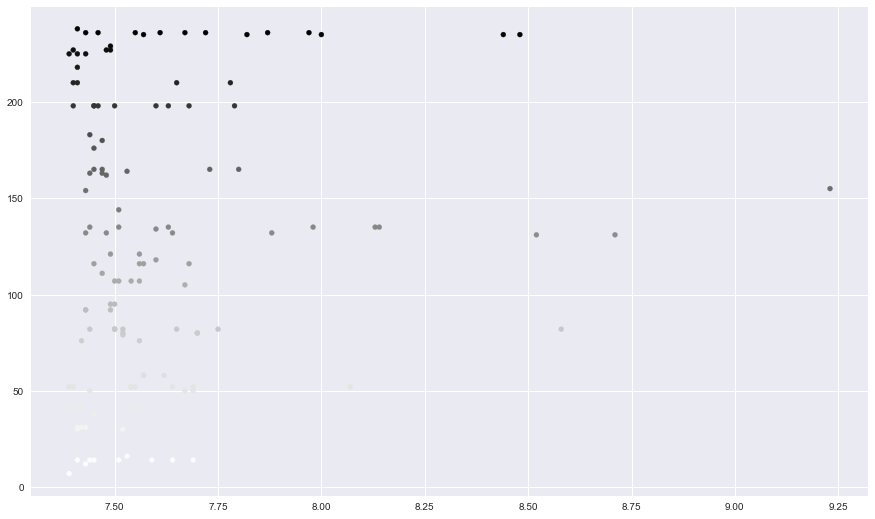

In [38]:
plt.scatter(df_outs["Rating"], df_outs["cluster"], s=25, c=df_outs["cluster"])
plt.show()

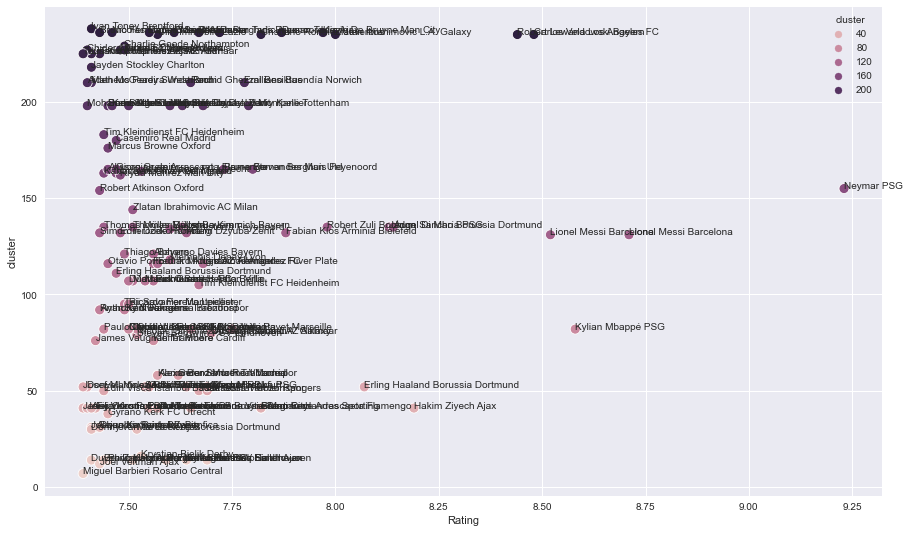

In [39]:
sns.scatterplot(x='Rating', 
                y='cluster', 
                hue='cluster',
                s=100, 
                data=df_outs)

for i,k,p in zip(df_outs["Rating"],df_outs["cluster"],df_outs["name"]):
    plt.text(i, k, p)
    

plt.show()

#결과는 nan 값 즉 아웃츠 중에 분류가 안된 녀석들 뺴고는 다 나옴 / 전체 아웃츠가 포함되도록 세팅해서 돌려보면 괜찮을 듯
#이후 결과 검증은 이름나지 않은 선수들이 현재 시즌에 어떤 팀으로 옮겼나 혹은 퍼포먼스? 이건 너무 간거 갔기도 함


#다듬거나 생각해야할 부분들

#1. 시각화 부분에서는 좀더 다듬어야할 필요가 보이긴 함
#2. 현재는 나쁜 지표까지도 포함해서 클러스터링을 하고 있다. 최고의 선수들과 함께 클러스터링 되는 것을 보는 관점이라면
#굳이 나쁜 것까지 생각해야하나? 그렇게 생각하면 나쁜 지표에서 탑을 달리는 선수들이 아웃라이어에 포함되는 것이 아닌가?
#3. 위에 대한 답으로는 일정 rating 이상을 보도록 하면 될 듯하다.

#아무튼 결론적으로 절대 어느 클러스터에도 속하지 않으려는 튀는 값들 즉 성적이 뛰어난 선수들을 어떻게든 분리하는게 목적이라면
#k의 개수를 많이 늘리는 것이 절대적으로 좋다? 라는 물음에 대해 고민해야함